In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
ncar = 181
dgrid = 540e-6
w0 =40e-6
xlamds = 1.261043e-10
zsep = 140
c_speed  = 299792458
nslice = 1024
dt = xlamds*zsep/c_speed

h_Plank = 4.135667696e-15
c_speed  = 299792458
hw0 = h_Plank * c_speed/xlamds

In [16]:
chirp_jitter = [ "1","3","5", "10"]
pulse_energy_jitter = []
spectra_center_jitter = []
nRound = 31
for jitter in chirp_jitter:
    folder_name = 'data_chirp_jitter' + jitter
    result = []
    extrac = []
    for iteration in range(nRound):
        filename = 'n' + str(iteration) + '_recirc' + '.txt'
        power_list = []
        with open(folder_name + '/' + filename) as f:
            lines = f.readlines()

        round_list = []
        power_list = []
        for k in range(1,len(lines)):
            temp = lines[ k].split(' ')
            nround = int(temp[0])
            power = float(temp[2])
            round_list.append(nround)
            power_list.append(power)
        power_list = [x for _, x in sorted(zip(round_list, power_list))]
        result.extend(power_list)



    for iteration in range(nRound):
        filename = 'n' + str(iteration) + '_transmit' + '.txt'
        with open(folder_name + '/' + filename) as f:
            lines = f.readlines()

        round_list = []
        power_list = []
        for k in range(1,len(lines)):
            temp = lines[ k].split(' ')
            nround = int(temp[0])
            power = float(temp[1])
            round_list.append(nround)
            power_list.append(power)
        power_list = [x for _, x in sorted(zip(round_list, power_list))]
        extrac.extend(power_list)

    power = result
    out_power = extrac
    
    
    out = out_power[::10]
    pulse_energy_jitter.append(np.std(out[5:])/np.mean(out[5:]))
    
    data = pickle.load( open( folder_name + "/spectra.p", "rb" ) )
    spectra_record0, spectra_record1 = data[0], data[1]
    
    center_list = []
    for hws, spectra in spectra_record0:
        center = np.sum(hws*spectra)/np.sum(spectra)
        center_list.append(center)

    dw = np.mean(center_list) - hw0
    spectra_center_jitter.append(np.std(center_list))


folder_name = 'data_chirp_jitter10'
result = []
extrac = []
nRound = 31

for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    result.extend(power_list)



for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[1])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)

power = result
out_power = extrac


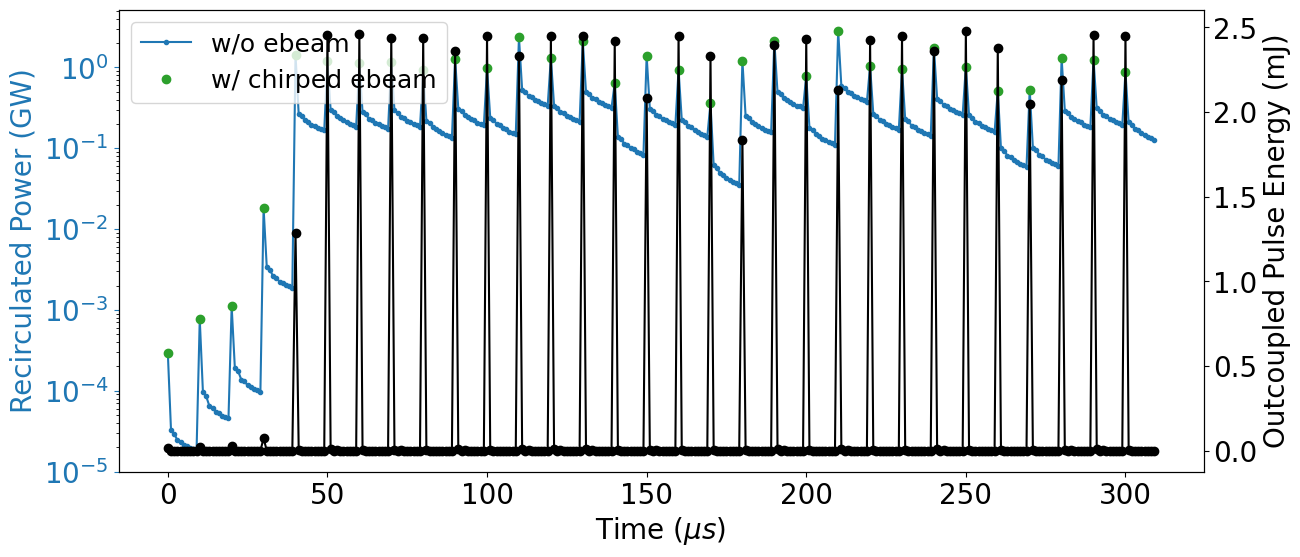

In [17]:
fontsize = 20
plt.figure(figsize = (14,6))
x = np.arange(len(power))
plt.plot(np.array(power),'.-', label = 'w/o ebeam')
plt.plot(x[::10], power[::10],'o', color = 'C2', label = 'w/ chirped ebeam')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')
plt.legend(fontsize = fontsize -2, loc = 'upper left')
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C0', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()

ax2.plot(np.array(out_power)/1e3, '-o',color = 'k')
ax2.set_ylabel('Outcoupled Pulse Energy (mJ)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')

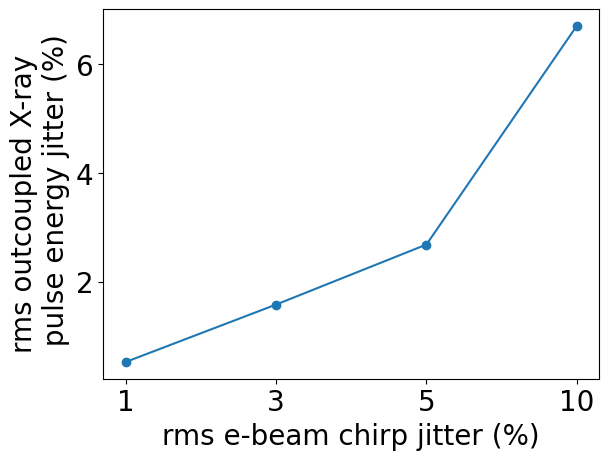

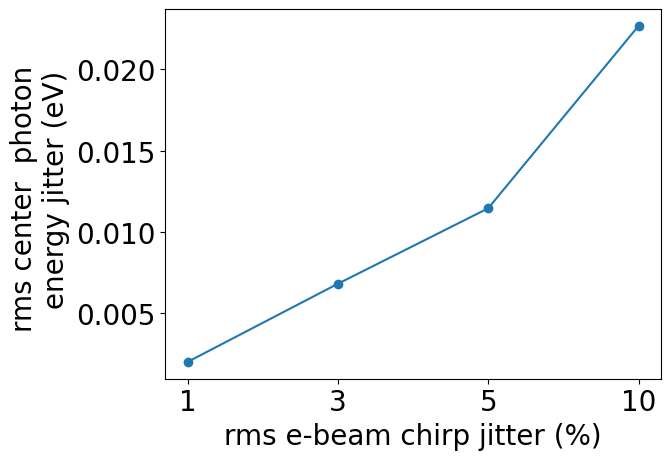

In [9]:
plt.plot(chirp_jitter, np.array(pulse_energy_jitter)*100,'o-', color = 'C0')
plt.xlabel('rms e-beam chirp jitter (%)', fontsize = fontsize)
plt.ylabel('rms outcoupled X-ray  \n pulse energy jitter (%)', fontsize = fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
plt.show()

plt.plot(chirp_jitter, spectra_center_jitter, 'o-',color = 'C0')
plt.xlabel('rms e-beam chirp jitter (%)', fontsize = fontsize)

plt.ylabel('rms center  photon \n energy jitter (eV)', fontsize = fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
plt.show()

## Mirror misalignment

In [10]:
folder_name = 'data_long_stats_400_w0r'
result = []
extrac = []
xcenter = []
nRound = 11

for iteration in range(nRound):
    
    if iteration == 8:
        continue
    
    filename = 'n' + str(iteration) + '_recirc' + '.txt'
    power_list = []
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()

    round_list = []
    power_list = []
    center_list = []
    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        c = float(temp[6])
        round_list.append(nround)
        power_list.append(power)
        center_list.append(c)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    center_list = [x for _, x in sorted(zip(round_list, center_list))]
    result.extend(power_list)
    xcenter.extend(center_list)




for iteration in range(nRound):
    filename = 'n' + str(iteration) + '_transmit' + '.txt'
    with open(folder_name + '/' + filename) as f:
        lines = f.readlines()
    
   
    round_list = []
    power_list = []

    for k in range(1,len(lines)):
        temp = lines[ k].split(' ')
        nround = int(temp[0])
        power = float(temp[2])
        round_list.append(nround)
        power_list.append(power)
    power_list = [x for _, x in sorted(zip(round_list, power_list))]
    extrac.extend(power_list)


power = result
out_power = extrac

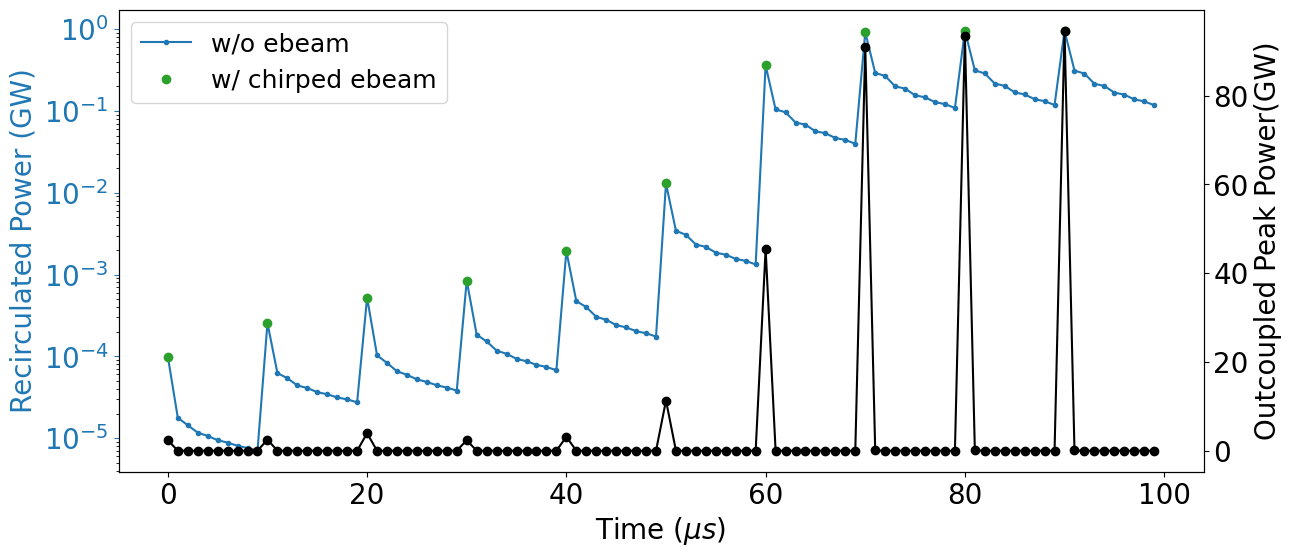

In [12]:

fontsize = 20
plt.figure(figsize = (14,6))
x = np.arange(len(power))
plt.plot(np.array(power),'.-', label = 'w/o ebeam')
plt.plot(x[::10], power[::10],'o', color = 'C2', label = 'w/ chirped ebeam')
#plt.plot(x[240::120], power[240::120],'o', color = 'C1', label = 'w/ chirped ebeam')
#plt.plot([x[240],x[390],x[540], x[690], x[840], x[990]], [power[240], power[390], power[540], power[690], power[840], power[990]], 'o', label = 'w/ chirped ebeam')
plt.legend(fontsize = fontsize -2, loc = 'upper left')
plt.yscale('log')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recirculated Power (GW)', color = 'C0', fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize, colors = 'C0')
ax.tick_params(axis='x', labelsize=fontsize)
ax2 = ax.twinx()

ax2.plot(np.array(out_power), '-o',color = 'k')
ax2.set_ylabel('Outcoupled Peak Power(GW)', color = 'k', fontsize = fontsize)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelsize=fontsize, colors = 'k')

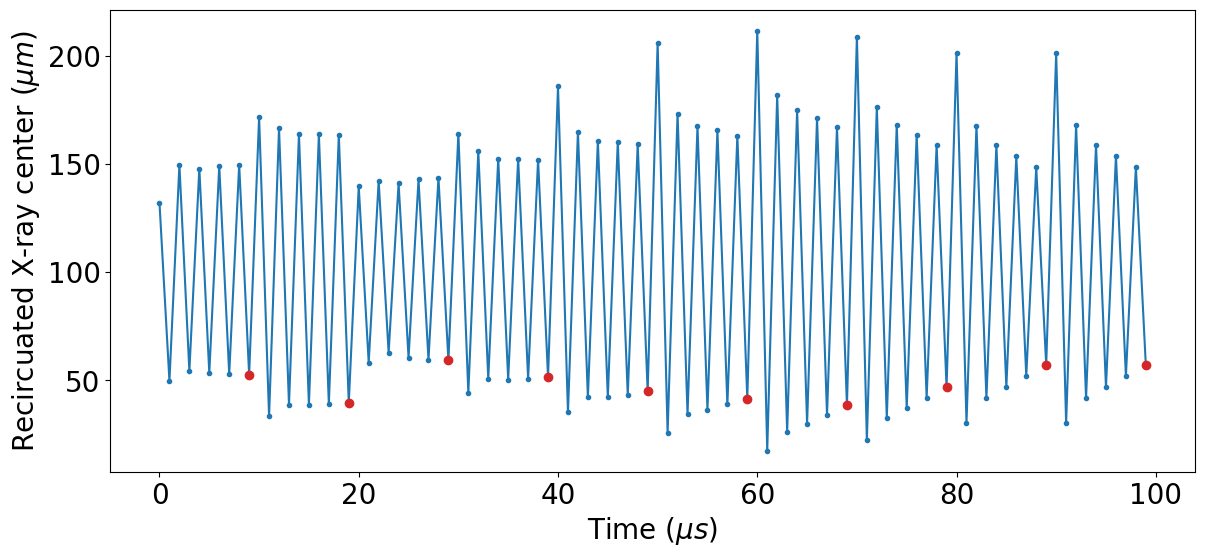

In [15]:
fontsize = 20
plt.figure(figsize = (14,6))
x = np.arange(len(power))
plt.plot(np.array(xcenter),'.-')
plt.plot(x[9::10], xcenter[9::10],'o', color = 'C3')
plt.xlabel('Time ($\mu s$)', fontsize =fontsize)
plt.ylabel('Recircuated X-ray center ($\mu m$)',  fontsize=fontsize)
ax = plt.gca()
ax.tick_params(axis='y', labelsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)